In [1]:
%reload_ext autoreload
%autoreload 2
%reload_ext notexbook
%texify

In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from narsil2.tracking.track import trackSingleChannel
from narsil2.mm.tracking import process_one_position
from narsil2.fish.transformations import FishTransformations
from narsil2.fish.datasets import singleColourFISHData

In [4]:
root_dir = '/mnt/sda2/Praneeth/ASTFISH/'
phenotype_dir = root_dir + 'data/EXP-21-BV6157 AST FISH 210520/The run/'
genotype_dir = root_dir  + 'data/EXP-21-BV6157 AST FISH 210520/Genotype/'
analysis_dir = root_dir  + 'analysis_rev/EXP-21-BV6157 AST FISH 210520/'

In [5]:
tracking_parameters = {
    'move_iou_thres': 0.15,
    'div_iou_thres' : 0.15,
    'write_dir_names': {
        'channel_stacks': 'blobs',
        'growth_rates': 'growth_rates',
        'fluor_stacks': 'fish_channels',
    },
    'growth_type': 'rolling', # or 'ratio'
    'net_path': '../../saved_models/tracker_model.pth',
    'species_map': {
        'Klebsiella': {'cy5'},
        'E.coli' : {'cy3'},
        'Pseudomonas': {'texasred'},
        'E.cocci': {'alexa488'}
    },
    'background_channel_no': 15,
    'flip_positions': range(201, 276),
    'num_channels': 32,
    'growth_type': 'rolling'
}
fluorescence_parameters = {
    'channel_names': ['alexa488', 'cy3', 'cy5', 'texasred'],
    'channel_width': 80,
    'flip_positions': range(201, 275),
    'transform': FishTransformations(return_tensors=False, pad_to=16, shrink_half=False, flip=False),
    'phase_img_to_map': 'img_000000031.tiff', # ususally the last image in the stack,
    'equalize': 'equalize_adapthist',
    'analysis_dir': analysis_dir,
    'write_dir_names': {
        'fluor_stacks': 'fish_channels',
    },
    'genotype_dir': genotype_dir, 
}


fluor_parameters = {
   'fluor_channel_thres': {'alexa488': 8000, 'cy5': 8000, 'cy3' : 8000, 'texasred': 4000},
    'channel_names': ['alexa488', 'cy5', 'cy3', 'texasred'],
    'min_box_height': 90,
}

In [6]:
position = 'Pos137'

In [7]:
background_channel_no = tracking_parameters['background_channel_no']
bg_dirname = Path(analysis_dir) / str(position) / tracking_parameters['write_dir_names']['fluor_stacks'] / str(background_channel_no)

bg_fish_data = singleColourFISHData(bg_dirname, fluorescence_parameters['channel_names'])

In [8]:
channel_no = 14
one_channel_path = Path(analysis_dir) / str(position) / tracking_parameters['write_dir_names']['channel_stacks'] / str(channel_no)
fish_channel_path = Path(analysis_dir) / str(position) / tracking_parameters['write_dir_names']['fluor_stacks'] /str(channel_no)


flip = False
fish_data = singleColourFISHData(fish_channel_path, fluor_parameters['channel_names'],
                                fluor_channel_threshold=fluor_parameters['fluor_channel_thres'],
                                transforms='box', background_fishdata=bg_fish_data,
                                min_box_height=fluor_parameters['min_box_height'],
                                flip=flip)

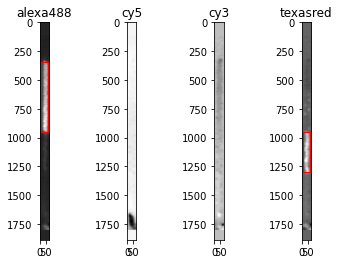

In [9]:
fish_data.plot_all_channels()

In [10]:


def process_one_channel(one_channel_path, fish_data, tracking_parameters, flip, fish_data_type):
    
    #print(one_channel_path)
    stack = trackSingleChannel(data_stack_path=one_channel_path,
            net_path = tracking_parameters['net_path'], 
            tracking_parameters=tracking_parameters,
            train_mode=False, fish_data=fish_data,
            species_map=tracking_parameters['species_map'],
            flip=flip, fish_data_type=fish_data_type,
            )
    stack.do_tracking()
    print(one_channel_path)
    stack.plot_all_links_with_FISH()
    stack.construct_tracks_from_links()
    stack.label_tracks_with_fluor_channels()
    stack.set_species_for_all_tracks()
    #stack.calculate_ratio_growth_all_tracks()
    #stack.calculate_rolling_growth_all_tracks()
    #stack.write_growth_to_file()
    return stack

/mnt/sda2/Praneeth/ASTFISH/analysis_rev/EXP-21-BV6157 AST FISH 210520/Pos137/blobs/14


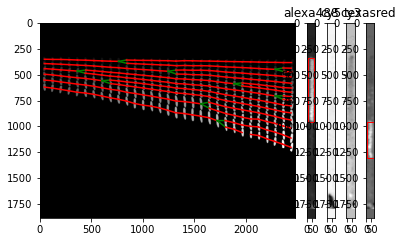

In [11]:
stack = process_one_channel(one_channel_path, fish_data, tracking_parameters, flip, 'single')

In [12]:
channel_no = 23
one_channel_path = Path(analysis_dir) / str(position) / tracking_parameters['write_dir_names']['channel_stacks'] / str(channel_no)
fish_channel_path = Path(analysis_dir) / str(position) / tracking_parameters['write_dir_names']['fluor_stacks'] /str(channel_no)


flip = False
fish_data = singleColourFISHData(fish_channel_path, fluor_parameters['channel_names'],
                                fluor_channel_threshold=fluor_parameters['fluor_channel_thres'],
                                transforms='box', background_fishdata=bg_fish_data,
                                min_box_height=fluor_parameters['min_box_height'],
                                flip=flip)

/mnt/sda2/Praneeth/ASTFISH/analysis_rev/EXP-21-BV6157 AST FISH 210520/Pos137/blobs/23


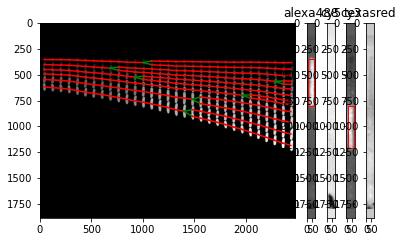

In [13]:
process_one_channel(one_channel_path, fish_data, tracking_parameters, flip, 'single')

In [14]:
channel_no = 27
one_channel_path = Path(analysis_dir) / str(position) / tracking_parameters['write_dir_names']['channel_stacks'] / str(channel_no)
fish_channel_path = Path(analysis_dir) / str(position) / tracking_parameters['write_dir_names']['fluor_stacks'] /str(channel_no)


flip = False
fish_data = singleColourFISHData(fish_channel_path, fluor_parameters['channel_names'],
                                fluor_channel_threshold=fluor_parameters['fluor_channel_thres'],
                                transforms='box', background_fishdata=bg_fish_data,
                                min_box_height=fluor_parameters['min_box_height'],
                                flip=flip)

/mnt/sda2/Praneeth/ASTFISH/analysis_rev/EXP-21-BV6157 AST FISH 210520/Pos137/blobs/27


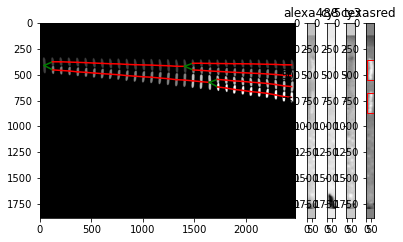

In [15]:
stack = process_one_channel(one_channel_path, fish_data, tracking_parameters, flip, 'single')

#### Print the tracks in the stack to look at species for each track

In [18]:
stack.tracks

[{'dir': PosixPath('/mnt/sda2/Praneeth/ASTFISH/analysis_rev/EXP-21-BV6157 AST FISH 210520/Pos137/blobs/27'),
  'track_dict': OrderedDict([(0, 0)]),
  'daughters_list': [{1: 0}, {1: 1}],
  '_parent_index': [],
  'species': 'Pseudomonas',
  'fluor_channels': {'texasred'},
  'areas': {0: 3472},
  'lengths': {0: 167.1837318436168},
  'time_points': 30,
  'areas_np': array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         -1., -1., -1., -1., -1.]),
  'growth_np': array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         -1., -1., -1., -1., -1.]),
  'areas_rolling_np': array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
         -1., -1., -1., -1., -1.]),
  'growth_rolling_np': array([-1., -1., -1., -1., -1

#### Use the tracks to color the links.
